<a href="https://colab.research.google.com/github/berkaycamur/data_science_projects/blob/main/Hello%20World%20of%20the%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

# Importing data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# Visualizing the data

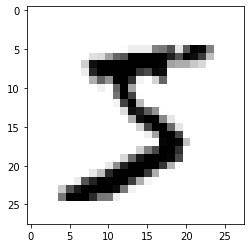

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

# Data Preprocessing

In [ ]:
print("Before reshaping")
print(f"Training variabes's shape is : {x_train.shape}, test variables's shape is : {x_test.shape} ")
x_train = tf.keras.utils.normalize(x_train, axis = 1) #Normalizing of the train data
x_test = tf.keras.utils.normalize(x_test, axis = 1) #Normalizing of the test data
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)
print("\nAfter reshaping")
print(f"Training variabes's shape is : {x_train.shape}, test variables's shape is : {x_test.shape} ")

Before reshaping
Training variabes's shape is : (60000, 28, 28), test variables's shape is : (10000, 28, 28) 

After reshaping
Training variabes's shape is : (60000, 784), test variables's shape is : (10000, 784) 


# Set up the neural network

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation= "relu", input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
fitted_model = model.fit(x_train, y_train, batch_size=128, epochs=20,  verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.2707 - accuracy: 0.9170 - val_loss: 0.1274 - val_accuracy: 0.9602
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1130 - accuracy: 0.9657 - val_loss: 0.0952 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0809 - accuracy: 0.9757 - val_loss: 0.0918 - val_accuracy: 0.9746
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.0976 - val_accuracy: 0.9750
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0910 - val_accuracy: 0.9782
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.1015 - val_accuracy: 0.9774
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.1001 - val_accuracy:

In [ ]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)


INFO:tensorflow:Assets written to: epic_num_reader.model/assets
[[1.1739438e-32 1.0094270e-25 6.3723389e-23 ... 1.0000000e+00
  3.6486903e-31 1.4168974e-21]
 [0.0000000e+00 5.0753141e-25 1.0000000e+00 ... 3.1599885e-33
  0.0000000e+00 0.0000000e+00]
 [6.6889354e-24 1.0000000e+00 6.8486349e-15 ... 5.1656075e-12
  2.2798998e-14 2.6810775e-20]
 ...
 [1.5241829e-24 4.1624546e-16 4.4706491e-19 ... 5.3816777e-12
  4.9436195e-17 2.6672215e-11]
 [8.9559827e-30 2.0913695e-31 6.3619725e-29 ... 1.4384382e-26
  1.8042088e-15 5.7035009e-32]
 [3.3409570e-29 4.8960361e-35 1.4147891e-31 ... 1.6971501e-36
  3.7572031e-27 1.9578989e-36]]


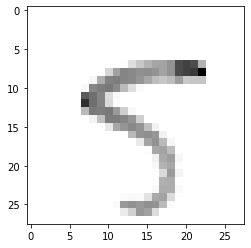

In [ ]:
x_test = x_test.reshape(10000, 28, 28)
plt.imshow(x_test[6909],cmap=plt.cm.binary)
plt.show()

In [ ]:
import numpy as np
print(np.argmax(predictions[6909]))

5
[1.1739438e-32 1.0094270e-25 6.3723389e-23 6.8286438e-25 1.5153981e-26
 6.2241967e-32 0.0000000e+00 1.0000000e+00 3.6486903e-31 1.4168974e-21]
